In [13]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
from dotenv import load_dotenv
import os
import mplcyberpunk
load_dotenv(dotenv_path='a.env')
vantage_key = os.environ['VANTAGE_KEY']

# Replace the "demo" apikey below with your own key from https://www.alphavantage.co/support/#api-key
url = f'https://www.alphavantage.co/query?function=CASH_FLOW&symbol=WRK&apikey={vantage_key}'
r = requests.get(url)
data = r.json()

# Extract relevant data from the API response
cash_flow_data = data.get("", {})
if not cash_flow_data:
    print("No cash flow data available.")
else:
    df = pd.DataFrame(cash_flow_data)
    df.to_csv("cash_flow.csv")
    print(df)

No cash flow data available.


In [15]:
import requests
from dotenv import load_dotenv
import os

load_dotenv(dotenv_path='a.env')
vantage_key = os.environ['VANTAGE_KEY']

# Replace the "demo" apikey below with your own key from https://www.alphavantage.co/support/#api-key
url = f'https://www.alphavantage.co/query?function=CASH_FLOW&symbol=IBM&apikey={vantage_key}'
r = requests.get(url)

# Check if the request was successful
if r.status_code == 200:
    data = r.json()
    
    # Extract the "annualReports" data
    annual_reports = data.get("annualReports", [])
    
    # Create a DataFrame from the extracted data
    df = pd.DataFrame(annual_reports)
    
    # Save the DataFrame to a CSV file
    df.to_csv("cash_flow.csv", index=False)
    
    # Print the DataFrame
    print(df)
else:
    print(f"Failed to retrieve data. Status code: {r.status_code}")


  fiscalDateEnding reportedCurrency operatingCashflow  \
0       2022-12-31              USD       10435000000   
1       2021-12-31              USD       12796000000   
2       2020-12-31              USD       18197000000   
3       2019-12-31              USD       14770000000   
4       2018-12-31              USD       15247000000   

  paymentsForOperatingActivities proceedsFromOperatingActivities  \
0                     2430000000                            None   
1                     2655000000                            None   
2                     3406000000                            None   
3                     3234000000                            None   
4                     1423000000                            None   

  changeInOperatingLiabilities changeInOperatingAssets  \
0                    213000000               468000000   
1                     85000000             -1510000000   
2                    138000000             -5088000000   
3               

   fiscalDateEnding  netBurnRate
0        2023-06-30   -388217000
1        2023-03-31   -396624000
2        2022-12-31   -391261000
3        2022-09-30   -556335000
4        2022-06-30   -591860000
5        2022-03-31   -492772000
6        2021-12-31   -560435000
7        2021-09-30   -499420000
8        2021-06-30   -569444000
9        2021-03-31   -504611000
10       2020-12-31   -556503000
11       2020-09-30  -1841122000
12       2020-06-30   -393079000
13       2020-03-31   -289492000
14       2019-12-31   -460234000
15       2019-09-30   -409468000


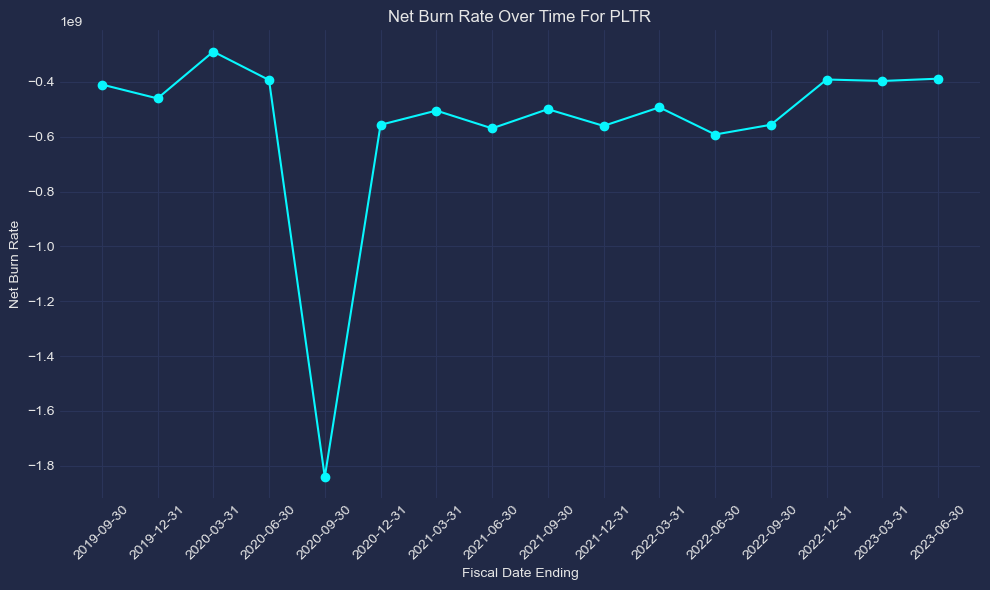

In [2]:
#plots individual table and chart for net burn rate
import requests
import pandas as pd
import matplotlib.pyplot as plt
from dotenv import load_dotenv
import os
import mplcyberpunk

plt.style.use("cyberpunk")

def plot_net_burn_rate(symbol):
    load_dotenv(dotenv_path='a.env')
    
    vantage_key = os.environ['VANTAGE_KEY']
    
    url = f'https://www.alphavantage.co/query?function=INCOME_STATEMENT&symbol={symbol}&apikey={vantage_key}'
    r = requests.get(url)
    data = r.json()
    
    income_statement = data['quarterlyReports']
    df = pd.DataFrame(income_statement)
    
    numeric_cols = ['netIncome', 'operatingExpenses']
    df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')
    
    df['netBurnRate'] = df['netIncome'] - df['operatingExpenses']
    
    print(df[['fiscalDateEnding', 'netBurnRate']])
    
    plt.figure(figsize=(10, 6))
    plt.plot(df['fiscalDateEnding'], df['netBurnRate'], marker='o')
    plt.xlabel('Fiscal Date Ending')
    plt.ylabel('Net Burn Rate')
    plt.title(f'Net Burn Rate Over Time For {symbol}')
    plt.xticks(rotation=45)
    plt.gca().invert_xaxis()
    plt.tight_layout()
    plt.show()

# List of stock tickers
stock_tickers = ['PLTR']  # Add more as needed

for symbol in stock_tickers:
    plot_net_burn_rate(symbol)


In [8]:
#News Sentiment
import requests
import pandas as pd
from dotenv import load_dotenv
import os

load_dotenv(dotenv_path='a.env')

vantage_key = os.environ['VANTAGE_KEY']

symbol = "NVDA"

# Replace the "demo" apikey below with your own key from https://www.alphavantage.co/support/#api-key
url = 'https://www.alphavantage.co/query?function=NEWS_SENTIMENT&tickers={symbol}&apikey={vantage_key}'
r = requests.get(url)
data = r.json()


df = pd.DataFrame(data, index=data)
print(data)

{'Information': 'Invalid inputs. Please refer to the API documentation https://www.alphavantage.co/documentation#newsapi and try again.'}


In [ ]:
#News Sentiment
import requests
import pandas as pd
from dotenv import load_dotenv
import os

load_dotenv(dotenv_path='a.env')

vantage_key = os.environ['VANTAGE_KEY']

symbol = "CPB"

# Replace the "demo" apikey below with your own key from https://www.alphavantage.co/support/#api-key
url = 'https://www.alphavantage.co/query?function=NEWS_SENTIMENT&tickers={symbol}&apikey={vantage-key}'
r = requests.get(url)
data = r.json()


df = pd.DataFrame(data)
print(data)

In [1]:
#Balance sheet to CSV
import requests
import pandas as pd
from dotenv import load_dotenv
import os

load_dotenv(dotenv_path='a.env')

vantage_key = os.environ['VANTAGE_KEY']

# replace the "demo" apikey below with your own key from https://www.alphavantage.co/support/#api-key
url = 'https://www.alphavantage.co/query?function=TOP_GAINERS_LOSERS&apikey={vantage-key}'
r = requests.get(url)
data = r.json()
df = pd.DataFrame(data)

print(df)

                                             metadata  \
0   Top gainers, losers, and most actively traded ...   
1   Top gainers, losers, and most actively traded ...   
2   Top gainers, losers, and most actively traded ...   
3   Top gainers, losers, and most actively traded ...   
4   Top gainers, losers, and most actively traded ...   
5   Top gainers, losers, and most actively traded ...   
6   Top gainers, losers, and most actively traded ...   
7   Top gainers, losers, and most actively traded ...   
8   Top gainers, losers, and most actively traded ...   
9   Top gainers, losers, and most actively traded ...   
10  Top gainers, losers, and most actively traded ...   
11  Top gainers, losers, and most actively traded ...   
12  Top gainers, losers, and most actively traded ...   
13  Top gainers, losers, and most actively traded ...   
14  Top gainers, losers, and most actively traded ...   
15  Top gainers, losers, and most actively traded ...   
16  Top gainers, losers, and mo

In [79]:
import requests
import pandas as pd
from dotenv import load_dotenv
import os

load_dotenv(dotenv_path='a.env')

vantage_key = os.environ['VANTAGE_KEY']

CSV_URL = f'https://www.alphavantage.co/query?function=NEWS_SENTIMENT&topics=mergers_and_acquisition&apikey={vantage_key}'

with requests.Session() as s:
    download = s.get(CSV_URL)
    decoded_content = download.content.decode('utf-8')
    cr = csv.reader(decoded_content.splitlines(), delimiter=',')
    my_list = list(cr)
    df = pd.DataFrame(my_list)
    # Save the DataFrame to an Excel file
    excel_filename = 'news_sentiment.xlsx'
    df.to_excel(excel_filename, index=False)

print(f"DataFrame saved to '{excel_filename}'")


DataFrame saved to 'news_sentiment.xlsx'


In [4]:
import requests
import pandas as pd
from dotenv import load_dotenv
import os
import json

load_dotenv(dotenv_path='a.env')

vantage_key = os.environ['VANTAGE_KEY']

CSV_URL = 'https://www.alphavantage.co/query?function=NEWS_SENTIMENT&topics=mergers_and_acquisition&apikey={vantage-key}'

with requests.Session() as s:
    response = s.get(CSV_URL)
    json_data = json.loads(response.content)
    
    # Extract relevant data from the JSON response
    news_data = json_data.get('feed', [])
    
    # Extract title, ticker, and overall_sentiment_label for each news item
    data = []
    for item in news_data:
        ticker_sentiment = item.get('ticker_sentiment', [])
        for ticker_item in ticker_sentiment:
            ticker = ticker_item.get('ticker', '')
            title = item.get('title', '')
            overall_sentiment_label = item.get('overall_sentiment_label', '')
            data.append({'ticker': ticker, 'title': title, 'overall_sentiment_label': overall_sentiment_label})
    
    # Create a DataFrame from the extracted data
    df = pd.DataFrame(data)
    
    df.to_csv('news_sentiment4.csv')
    
    # Print the DataFrame
    print(df)


         ticker                                              title  \
0           BLK  Uptober might be over: Bitcoin price data show...   
1     FOREX:CHF  Uptober might be over: Bitcoin price data show...   
2     FOREX:EUR  Uptober might be over: Bitcoin price data show...   
3     FOREX:GBP  Uptober might be over: Bitcoin price data show...   
4     FOREX:USD  Uptober might be over: Bitcoin price data show...   
..          ...                                                ...   
91        LBTYA  The Paley Center for Media Announces Additiona...   
92          WBD  The Paley Center for Media Announces Additiona...   
93         TTWO  The Paley Center for Media Announces Additiona...   
94   CRYPTO:ETH  How Today's Gaming Industry Intertwines With B...   
95  CRYPTO:MANA  How Today's Gaming Industry Intertwines With B...   

   overall_sentiment_label  
0                  Neutral  
1                  Neutral  
2                  Neutral  
3                  Neutral  
4             

In [82]:
#Balance sheet to CSV
import requests
import pandas as pd
from dotenv import load_dotenv
import os
import csv

load_dotenv(dotenv_path='a.env')

vantage_key = os.environ['VANTAGE_KEY']

# Replace the "demo" apikey below with your own key from https://www.alphavantage.co/support/#api-key
CSV_URL = 'https://www.alphavantage.co/query?function=NEWS_SENTIMENT&topics=mergers_and_acquisition&apikey={vantage-key}'

with requests.Session() as s:
    download = s.get(CSV_URL)
    decoded_content = download.content.decode('utf-8')
    cr = csv.reader(decoded_content.splitlines(), delimiter=',')
    my_list = list(cr)
    for row in my_list:
        print(row)

['{']
['    "items": "50"', '']
['    "sentiment_score_definition": "x <= -0.35: Bearish; -0.35 < x <= -0.15: Somewhat-Bearish; -0.15 < x < 0.15: Neutral; 0.15 <= x < 0.35: Somewhat_Bullish; x >= 0.35: Bullish"', '']
['    "relevance_score_definition": "0 < x <= 1', ' with a higher score indicating higher relevance."', '']
['    "feed": [']
['        {']
['            "title": "Bone ShibaSwap Defies The Odds Jumps 12% Even As Bitcoin', ' Ethereum', ' Dogecoin Take A Hit"', '']
['            "url": "https://www.benzinga.com/markets/cryptocurrency/23/08/34036949/bone-shibaswap-defies-the-odds-jumps-12-even-as-bitcoin-ethereum-dogecoin-take-a-hit"', '']
['            "time_published": "20230825T042610"', '']
['            "authors": [']
['                "Mehab Qureshi"']
['            ]', '']
['            "summary": "Bone ShibaSwap BONE/USD managed to defy the overall cryptocurrency market trends by recording a significant 12% increase', ' while popular tokens like Bitcoin BTC/USD', ' E

In [27]:
import csv
import requests
load_dotenv(dotenv_path='a.env')

vantage_key = os.environ['VANTAGE_KEY']

# replace the "demo" apikey below with your own key from https://www.alphavantage.co/support/#api-key
CSV_URL = 'https://www.alphavantage.co/query?function=EARNINGS_CALENDAR&horizon=3month&apikey={vantage-key}'

with requests.Session() as s:
    download = s.get(CSV_URL)
    decoded_content = download.content.decode('utf-8')
    cr = csv.reader(decoded_content.splitlines(), delimiter=',')
    my_list = list(cr)
    for row in my_list:
        print(row)

['symbol', 'name', 'reportDate', 'fiscalDateEnding', 'estimate', 'currency']
['A', 'Agilent Technologies Inc', '2023-11-20', '2023-10-31', '1.35', 'USD']
['AA', 'Alcoa Corp', '2023-10-17', '2023-09-30', '-0.42', 'USD']
['AABVF', 'AABVF', '2023-09-12', '2023-07-31', '', 'CAD']
['AACAY', 'AACAY', '2023-11-09', '2023-09-30', '0.0313', 'USD']
['AADI', 'Aadi Bioscience Inc', '2023-11-07', '2023-09-30', '-0.72', 'USD']
['AAGRY', 'AAGRY', '2023-10-30', '2023-09-30', '0', 'IDR']
['AAIC', 'Arlington Asset Investment Corp - Class A', '2023-11-13', '2023-09-30', '0.06', 'USD']
['AAL', 'American Airlines Group Inc', '2023-10-18', '2023-09-30', '0.89', 'USD']
['AAM-PA', 'AAM-PA', '2023-11-06', '2023-09-30', '', 'USD']
['AAMC', 'Altisource Asset Management Corp', '2023-10-31', '2023-09-30', '', 'USD']
['AAME', 'Atlantic American Corp', '2023-11-06', '2023-09-30', '', 'USD']
['AAN', 'Aarons Company Inc (The)', '2023-10-23', '2023-09-30', '0.07', 'USD']
['AAOI', 'Applied Optoelectronics Inc', '2023-11

In [29]:
import csv
import requests
import pandas as pd
from dotenv import load_dotenv
import os

load_dotenv(dotenv_path='a.env')

vantage_key = os.environ['VANTAGE_KEY']

CSV_URL = f'https://www.alphavantage.co/query?function=EARNINGS_CALENDAR&horizon=3month&apikey={vantage_key}'

with requests.Session() as s:
    download = s.get(CSV_URL)
    decoded_content = download.content.decode('utf-8')
    cr = csv.reader(decoded_content.splitlines(), delimiter=',')
    my_list = list(cr)

# Convert the list of lists to a DataFrame
df = pd.DataFrame(my_list[1:], columns=my_list[0])

# Convert 'reportDate' column to datetime
df['reportDate'] = pd.to_datetime(df['reportDate'])

# Sort the DataFrame by 'reportDate'
df.sort_values(by='reportDate', inplace=True)

df.to_csv("EarningsReports.csv")

print(df)


     symbol                 name reportDate fiscalDateEnding estimate currency
2713  FNNZF                FNNZF 2023-08-25       2023-07-31        0      USD
6886  TTMZF                TTMZF 2023-08-25       2023-06-30               CAD
3464  IDYLF                IDYLF 2023-08-25       2023-06-30               CAD
1352  CCOZY                CCOZY 2023-08-25       2023-06-30     1.22      CNY
6856  TSGTY                TSGTY 2023-08-25       2023-06-30     1.31      CNY
...     ...                  ...        ...              ...      ...      ...
5838  ROWKF                ROWKF 2023-11-22       2023-09-30               CAD
2722  FOLGF                FOLGF 2023-11-22       2023-09-30               USD
3470  IFLXF                IFLXF 2023-11-22       2023-09-30               CAD
6467   STVN  Stevanato Group Spa 2023-11-22       2023-09-30     0.16      EUR
802   BATXF                BATXF 2023-11-22       2023-09-30               CAD

[7567 rows x 6 columns]


In [ ]:
import requests
import pandas as pd
from dotenv import load_dotenv
import os

load_dotenv(dotenv_path='a.env')

vantage_key = os.environ['VANTAGE_KEY']

# Replace the "demo" apikey below with your own key from https://www.alphavantage.co/support/#api-key
API_URL = f'https://www.alphavantage.co/query?function=NEWS_SENTIMENT&tickers=DIS&apikey={vantage_key}'

# Fetch data from the API URL
response = requests.get(API_URL)

# Parse the JSON response into a DataFrame
data = pd.DataFrame(response.json())

(data.to_csv("results.csv"))


In [1]:
import requests
import pandas as pd
from dotenv import load_dotenv
import os
import io

load_dotenv(dotenv_path='a.env')

vantage_key = os.environ['VANTAGE_KEY']
CSV_URL = f'https://www.alphavantage.co/query?function=IPO_CALENDAR&apikey={vantage_key}'

# Fetch data from the CSV URL and create a DataFrame
response = requests.get(CSV_URL)
data = pd.read_csv(io.StringIO(response.text))

# Check if the DataFrame is empty
if data.empty:
    print("No IPO data available at the moment.")
else:
    # Print the DataFrame
    print(data)


  symbol                                        name     ipoDate  \
0    MSS  Maison Solutions Inc. Class A Common Stock  2023-10-03   
1   SMIZ                                 Zacks Trust  2023-10-03   
2   NATL                      NCR Atleos Corporation  2023-10-17   

   priceRangeLow  priceRangeHigh currency  exchange  
0              0               0      USD    NASDAQ  
1              0               0      USD  NYSEArca  
2              0               0      USD      NYSE  


In [ ]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
from dotenv import load_dotenv
import os
import mplcyberpunk



load_dotenv(dotenv_path='a.env')

vantage_key = os.environ['VANTAGE_KEY']

symbol = "F"

# Replace the "demo" apikey below with your own key from https://www.alphavantage.co/support/#api-key
url = f'https://www.alphavantage.co/query?function=NATR&symbol={symbol}&interval=weekly&time_period=14&apikey={vantage_key}'
r = requests.get(url)
data = r.json()

# Extracting the "NATR" values and dates from the API response
technical_data = data['Technical Analysis: NATR']
dates = [pd.to_datetime(date) for date in technical_data.keys()]
natr_values = [float(value['NATR']) for value in technical_data.values()]

# Create a DataFrame for the NATR data
df = pd.DataFrame({'Date': dates, 'NATR': natr_values})


# Plotting the chart
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['NATR'], label='NATR', color='b')
plt.xlabel('Date')
plt.ylabel('NATR')
plt.title(f'Normalized Average True Range - NATR Values for {symbol} (Weekly)')
plt.legend()
plt.grid(True)
plt.show()



In [ ]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
from dotenv import load_dotenv
import os

load_dotenv(dotenv_path='a.env')

vantage_key = os.environ['VANTAGE_KEY']

symbol = "META"

# Replace the "demo" apikey below with your own key from https://www.alphavantage.co/support/#api-key
url = f'https://www.alphavantage.co/query?function=DEMA&symbol={symbol}&interval=weekly&time_period=10&series_type=open&apikey={vantage_key}'
r = requests.get(url)
data = r.json()

# Extracting the "NATR" values and dates from the API response
technical_data = data['Technical Analysis: DEMA']
dates = [pd.to_datetime(date) for date in technical_data.keys()]
natr_values = [float(value['DEMA']) for value in technical_data.values()]

# Create a DataFrame for the NATR data
df = pd.DataFrame({'Date': dates, 'DEMA': natr_values})

# Plotting the chart
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['DEMA'], label='DEMA', color='b')
plt.xlabel('Date')
plt.ylabel('DEMAS')
plt.title(f'DEMA Values for  {symbol} (Weekly)')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import requests
import pandas as pd
from dotenv import load_dotenv
import os
import io

load_dotenv(dotenv_path='a.env')

vantage_key = os.environ['VANTAGE_KEY']
# replace the "demo" apikey below with your own key from https://www.alphavantage.co/support/#api-key
url = 'https://www.alphavantage.co/query?function=DURABLES&apikey={VANTAGE_KEY}'
r = requests.get(url)
data = r.json()

# Assuming you want to plot "Durable Goods New Orders" values
time_series_key = 'Durable Goods New Orders'
time_series_data = data[time_series_key]

# Extracting the dates and values
dates = [pd.to_datetime(date) for date in time_series_data.keys()]
values = [float(value) for value in time_series_data.values()]

# Create a DataFrame for the time series data
df = pd.DataFrame({'Date': dates, 'Value': values})

# Plotting the chart
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Value'], label=time_series_key)
plt.xlabel('Date')
plt.ylabel('Value')
plt.title(f'{time_series_key} over time')
plt.legend()
plt.grid(True)
plt.show()


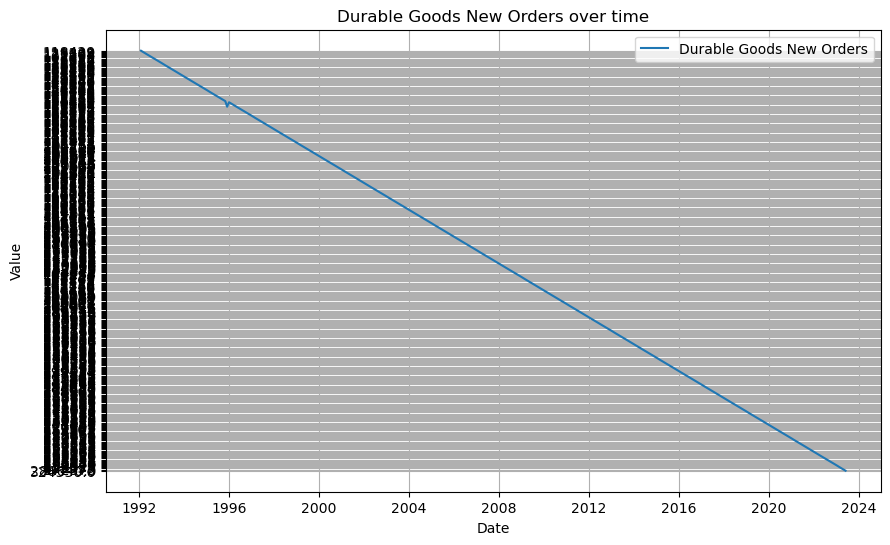

In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
from dotenv import load_dotenv
import os

load_dotenv(dotenv_path='a.env')

vantage_key = os.environ['VANTAGE_KEY']
# replace the "demo" apikey below with your own key from https://www.alphavantage.co/support/#api-key
url = f'https://www.alphavantage.co/query?function=DURABLES&apikey={vantage_key}'
r = requests.get(url)

# Fetch data from the API URL
data = r.json()

# Convert the "data" to a DataFrame
df = pd.DataFrame(data["data"])

# Convert the "date" column to datetime objects for better plotting
df["date"] = pd.to_datetime(df["date"])

# Plotting the chart
plt.figure(figsize=(10, 6))
plt.plot(df["date"], df["value"], label="Durable Goods New Orders")
plt.xlabel("Date")
plt.ylabel("Value")
plt.title("Durable Goods New Orders over time")
plt.legend()
plt.grid(True)
plt.show()


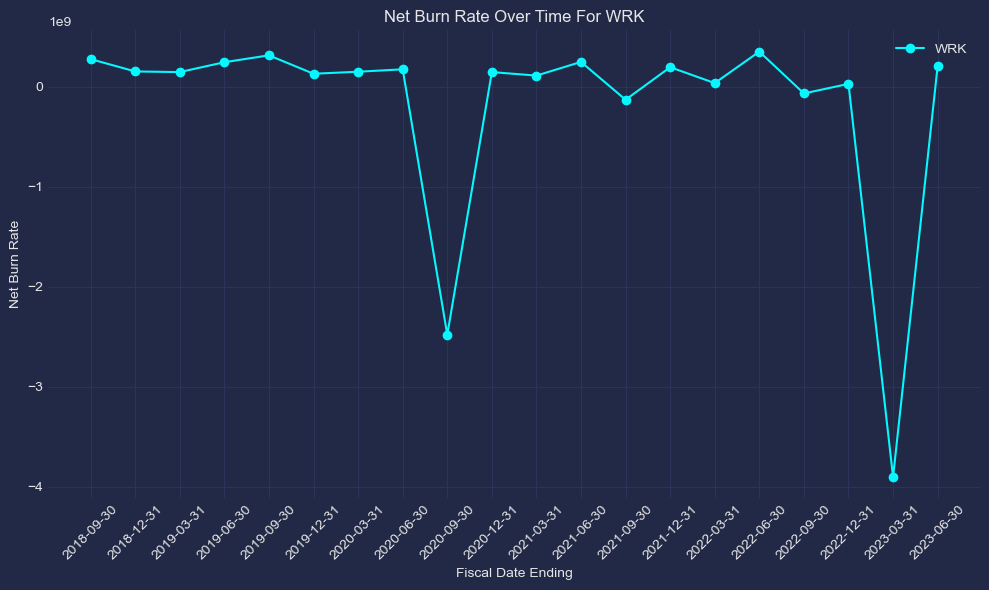

In [7]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
from dotenv import load_dotenv
import os
import mplcyberpunk

plt.style.use("cyberpunk")

def plot_net_burn_rate(symbol):
    load_dotenv(dotenv_path='a.env')
    
    vantage_key = os.environ['VANTAGE_KEY']
    
    url = f'https://www.alphavantage.co/query?function=INCOME_STATEMENT&symbol={symbol}&apikey={vantage_key}'
    r = requests.get(url)
    data = r.json()
    
    income_statement = data['quarterlyReports']
    df = pd.DataFrame(income_statement)
    
    numeric_cols = ['netIncome', 'operatingExpenses']
    df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')
    
    df['netBurnRate'] = df['netIncome'] - df['operatingExpenses']
    
    #print(df['netIncome','operatingExpenses'].head(5))
    
    return df[['fiscalDateEnding', 'netBurnRate']]

# List of stock tickers
stock_tickers = ['WRK']

plt.figure(figsize=(10, 6))
for symbol in stock_tickers:
    df = plot_net_burn_rate(symbol)
    plt.plot(df['fiscalDateEnding'], df['netBurnRate'], marker='o', label=symbol)

plt.xlabel('Fiscal Date Ending')
plt.ylabel('Net Burn Rate')
plt.title('Net Burn Rate Over Time For WRK')
plt.xticks(rotation=45)
plt.gca().invert_xaxis()
plt.legend()
plt.tight_layout()
plt.show()


No data available for FNNZF
No data available for TTMZF
No data available for IDYLF
No data available for CCOZY
No data available for TSGTY
No data available for DZSI
No data available for BMTLF
No data available for QGLDF
No data available for XYZFF
No data available for PTAUY
No data available for JKSM
No data available for MSNVF
No data available for CYRNQ
No data available for BSHI
No data available for BRSF
No data available for KTPPF
No data available for ONCR
No data available for JEXYY
No data available for AKBA
No data available for LPSIF
No data available for GPOTF


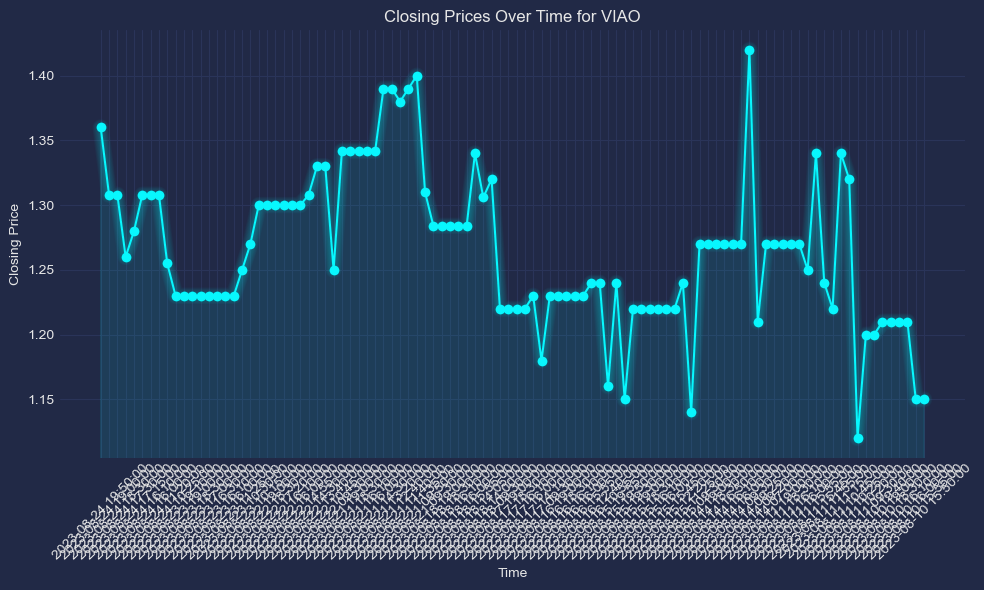

No data available for ULTRF
No data available for CHCJY


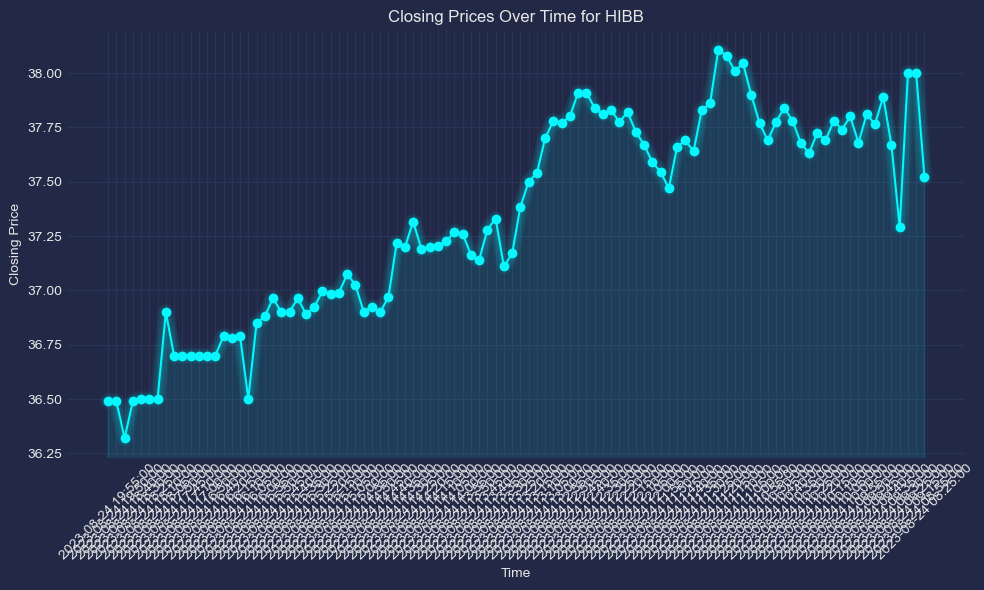

No data available for MPNGF
No data available for RGDFF
No data available for DTMXF
No data available for COE
No data available for MOGU


In [49]:
import requests
import matplotlib.pyplot as plt
import mplcyberpunk
from dotenv import load_dotenv
import os

def plot_stock_prices(symbol):
    plt.style.use("cyberpunk")
    
    load_dotenv(dotenv_path='a.env')
    vantage_key = os.environ['VANTAGE_KEY']
    
    url = f'https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol={symbol}&interval=5min&apikey={vantage_key}'
    r = requests.get(url)
    data = r.json()
    
    if 'Time Series (5min)' in data:
        time_series = data['Time Series (5min)']
        time_series = {timestamp: float(data_point['4. close']) for timestamp, data_point in time_series.items()}
        
        timestamps = list(time_series.keys())
        close_prices = list(time_series.values())
        
        plt.figure(figsize=(10, 6))
        plt.plot(timestamps, close_prices, marker='o')
        plt.xlabel('Time')
        plt.ylabel('Closing Price')
        plt.title(f'Closing Prices Over Time for {symbol}')
        plt.xticks(rotation=45)
        mplcyberpunk.add_glow_effects()
        plt.tight_layout()
        plt.show()
    else:
        print(f"No data available for {symbol}")

# Example usage
stock_tickers = ['FNNZF', 'TTMZF', 'IDYLF', 'CCOZY', 'TSGTY', 'DZSI', 'BMTLF', 'QGLDF', 'XYZFF', 'PTAUY', 'JKSM', 'MSNVF', 'CYRNQ', 'BSHI', 'BRSF', 'KTPPF', 'ONCR', 'JEXYY', 'AKBA', 'LPSIF', 'GPOTF', 'VIAO', 'ULTRF', 'CHCJY', 'HIBB', 'MPNGF', 'RGDFF', 'DTMXF', 'COE', 'MOGU']
for symbol in stock_tickers:
    plot_stock_prices(symbol)


In [50]:
import requests
from dotenv import load_dotenv
import os

load_dotenv(dotenv_path='a.env')

vantage_key = os.environ['VANTAGE_KEY']

# replace the "demo" apikey below with your own key from https://www.alphavantage.co/support/#api-key
url = 'https://www.alphavantage.co/query?function=OVERVIEW&symbol=IBM&apikey={vaantage_key}'
r = requests.get(url)
data = r.json()

print(data)

{'Symbol': 'IBM', 'AssetType': 'Common Stock', 'Name': 'International Business Machines', 'Description': 'International Business Machines Corporation (IBM) is an American multinational technology company headquartered in Armonk, New York, with operations in over 170 countries. The company began in 1911, founded in Endicott, New York, as the Computing-Tabulating-Recording Company (CTR) and was renamed International Business Machines in 1924. IBM is incorporated in New York. IBM produces and sells computer hardware, middleware and software, and provides hosting and consulting services in areas ranging from mainframe computers to nanotechnology. IBM is also a major research organization, holding the record for most annual U.S. patents generated by a business (as of 2020) for 28 consecutive years. Inventions by IBM include the automated teller machine (ATM), the floppy disk, the hard disk drive, the magnetic stripe card, the relational database, the SQL programming language, the UPC barcod

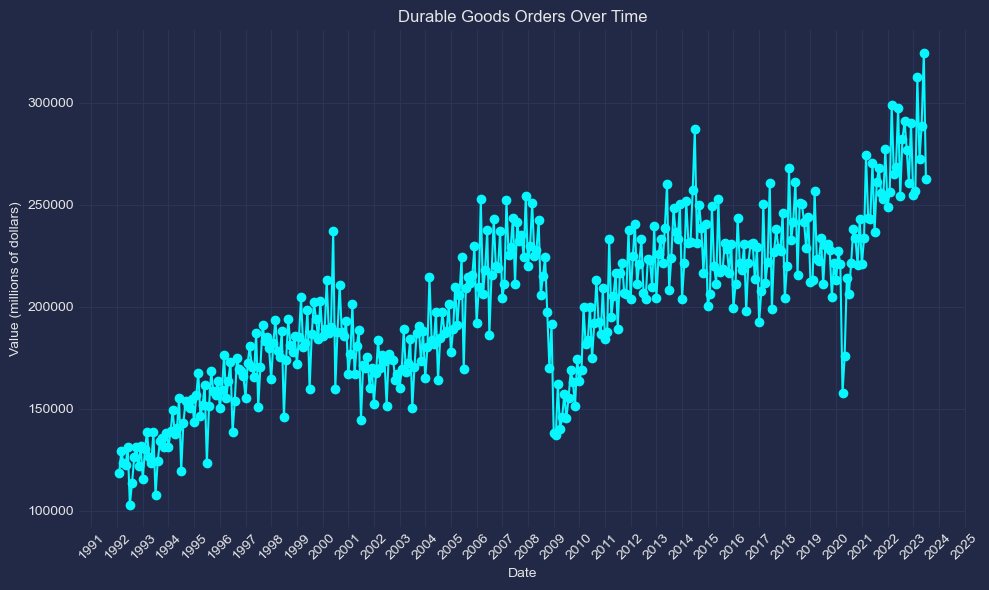

In [70]:
import requests
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime
from dotenv import load_dotenv
import os

def plot_durable_values():
    load_dotenv(dotenv_path='a.env')
    vantage_key = os.environ['VANTAGE_KEY']
    
    url = f'https://www.alphavantage.co/query?function=DURABLES&apikey={vantage_key}'
    r = requests.get(url)
    data = r.json()
    
    values = data['data']
    dates = [entry['date'] for entry in values]
    values = [float(entry['value']) for entry in values]  # Convert string values to floats
    
    # Convert dates to datetime objects and sort from oldest to newest
    date_objects = [datetime.strptime(date, '%Y-%m-%d') for date in dates]
    sorted_dates = sorted(date_objects)
    
    plt.figure(figsize=(10, 6))
    plt.plot(sorted_dates[::-1], values, marker='o')  # Invert x-axis values
    
    plt.xlabel('Date')
    plt.ylabel('Value (millions of dollars)')
    plt.title('Durable Goods Orders Over Time')
    
    # Format x-axis ticks to show only years
    plt.gca().xaxis.set_major_locator(mdates.YearLocator())
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    plt.xticks(rotation=45)
    
    plt.tight_layout()
    plt.show()

# Call the function to plot the chart
plot_durable_values()


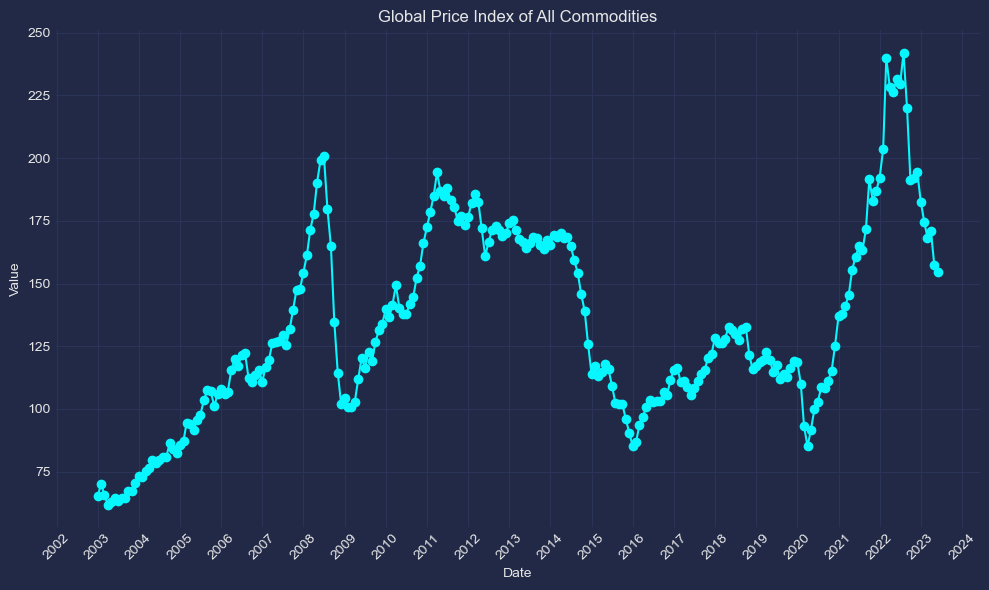

In [68]:
import requests
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime
from dotenv import load_dotenv
import os

def plot_global_commodities_index():
    load_dotenv(dotenv_path='a.env')
    vantage_key = os.environ['VANTAGE_KEY']
    
    url = f'https://www.alphavantage.co/query?function=ALL_COMMODITIES&interval=monthly&apikey={vantage_key}'
    r = requests.get(url)
    data = r.json()
    
    values = data['data']
    dates = []
    numeric_values = []
    
    for entry in values:
        if entry['value'] != '.':
            dates.append(entry['date'])
            numeric_values.append(float(entry['value'].replace(',', '')))
    
    # Convert dates to datetime objects and sort from oldest to newest
    date_objects = [datetime.strptime(date, '%Y-%m-%d') for date in dates]
    sorted_dates = sorted(date_objects)
    
    plt.figure(figsize=(10, 6))
    plt.plot(sorted_dates[::-1], numeric_values, marker='o')  # Invert x-axis values
    
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.title(data['name'])
    
    # Format x-axis ticks to show only years
    plt.gca().xaxis.set_major_locator(mdates.YearLocator())
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    plt.xticks(rotation=45)
    
    plt.tight_layout()
    plt.show()

# Call the function to plot the chart
plot_global_commodities_index()


In [4]:
import requests
import matplotlib.pyplot as plt
import mplcyberpunk
from dotenv import load_dotenv
import os

def plot_stock_prices(symbol, start_date, end_date):
    plt.style.use("cyberpunk")
    
    load_dotenv(dotenv_path='a.env')
    vantage_key = os.environ['VANTAGE_KEY']
    
    url = f'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY_ADJUSTED&symbol={symbol}&apikey={vantage_key}'
    r = requests.get(url)
    data = r.json()
    
    if 'Time Series (Daily)' in data:
        time_series = data['Time Series (Daily)']
        time_series = {timestamp: float(data_point['5. adjusted close']) for timestamp, data_point in time_series.items() if start_date <= timestamp <= end_date}
        
        timestamps = list(time_series.keys())
        close_prices = list(time_series.values())
        
        plt.figure(figsize=(10, 6))
        plt.plot(timestamps, close_prices, marker='o')
        plt.xlabel('Time')
        plt.ylabel('Adjusted Closing Price')
        plt.title(f'Adjusted Closing Prices for {symbol} from {start_date} to {end_date}')
        plt.xticks(rotation=45)
        mplcyberpunk.add_glow_effects()
        plt.tight_layout()
        plt.show()
    else:
        print(f"No data available for {symbol}")

# Example usage with user-defined time period
stock_symbol = 'VAIO'  # Example stock symbol
start_date = '2023-01-01'  # User-defined start date
end_date = '2023-08-31'    # User-defined end date
plot_stock_prices(stock_symbol, start_date, end_date)


No data available for VAIO


In [17]:
import requests
import matplotlib.pyplot as plt
from dotenv import load_dotenv
import os

load_dotenv(dotenv_path='a.env')
vantage_key = os.environ['VANTAGE_KEY']

import requests

# replace the "demo" apikey below with your own key from https://www.alphavantage.co/support/#api-key
url = 'https://www.alphavantage.co/query?function=BALANCE_SHEET&symbol=IBM&apikey={vantage_key}'
r = requests.get(url)


# Check if the request was successful
if r.status_code == 200:
    data = r.json()
    
    # Extract the "annualReports" data
    annual_reports = data.get("annualReports", [])
    
    # Create a DataFrame from the extracted data
    df = pd.DataFrame(annual_reports)
    
    # Save the DataFrame to a CSV file
    df.to_csv("balance_sheet.csv", index=False)
    
    # Print the DataFrame
    print(df)
else:
    print(f"Failed to retrieve data. Status code: {r.status_code}")


  fiscalDateEnding reportedCurrency   totalAssets totalCurrentAssets  \
0       2022-12-31              USD  127243000000        29118000000   
1       2021-12-31              USD  132001000000        29539000000   
2       2020-12-31              USD  155971000000        39165000000   
3       2019-12-31              USD  152186000000        38420000000   
4       2018-12-31              USD  123382000000        49146000000   

  cashAndCashEquivalentsAtCarryingValue cashAndShortTermInvestments  \
0                            7886000000                  7886000000   
1                            6650000000                  6650000000   
2                           13188000000                 13812000000   
3                            8172000000                  8868000000   
4                           11379000000                 11997000000   

    inventory currentNetReceivables totalNonCurrentAssets  \
0  1552000000           14209000000           96874000000   
1  1649000000     

In [8]:
#Create dataframe with year and equity figures
import requests
import pandas as pd
from dotenv import load_dotenv
import os

load_dotenv(dotenv_path='a.env')
vantage_key = os.environ['VANTAGE_KEY']

# Replace the "demo" API key below with your own key from https://www.alphavantage.co/support/#api-key
url = f'https://www.alphavantage.co/query?function=BALANCE_SHEET&symbol=PLTR&apikey={vantage_key}'
r = requests.get(url)

if r.status_code == 200:
    data = r.json()
    annual_reports = data.get("annualReports", [])
    
    # Create a DataFrame from the extracted data
    df = pd.DataFrame(annual_reports)
    
    # Select only the desired columns
    selected_columns = ["fiscalDateEnding", "totalShareholderEquity"]
    df = df[selected_columns]
    
    # Save the DataFrame to a CSV file
    df.to_csv("balance_sheet_selected.csv", index=False)
    
    # Print the DataFrame
    print(df)
else:
    print(f"Failed to retrieve data. Status code: {r.status_code}")


  fiscalDateEnding totalShareholderEquity
0       2022-12-31             2565326000
1       2021-12-31             2291030000
2       2020-12-31             1522550000
3       2019-12-31            -1980642000


In [5]:
#Get desired columns for list of tickers
import requests
import pandas as pd
from dotenv import load_dotenv
import os

load_dotenv(dotenv_path='a.env')
vantage_key = os.environ['VANTAGE_KEY']

def get_balance_sheet_data(symbol):
    # Replace the "demo" API key below with your own key from https://www.alphavantage.co/support/#api-key
    url = f'https://www.alphavantage.co/query?function=BALANCE_SHEET&symbol={symbol}&apikey={vantage_key}'
    r = requests.get(url)

    if r.status_code == 200:
        data = r.json()
        annual_reports = data.get("annualReports", [])
        
        # Create a DataFrame from the extracted data
        df = pd.DataFrame(annual_reports)
        
        # Select the desired columns
        selected_columns = ["fiscalDateEnding", "treasuryStock", "totalShareholderEquity", "commonStock", "commonStockSharesOutstanding"]
        df = df[selected_columns]
        
        return df
    else:
        print(f"Failed to retrieve data for {symbol}. Status code: {r.status_code}")
        return None

# List of tickers to iterate through
ticker_list = ["F", "TSLA"]  # Add more tickers as needed

# Create a dictionary to store DataFrames for each ticker
dataframes = {}

# Iterate through the list of tickers
for ticker in ticker_list:
    df = get_balance_sheet_data(ticker)
    
    if df is not None:
        dataframes[ticker] = df

# Display the DataFrames for each ticker
for ticker, df in dataframes.items():
    print(f"DataFrame for {ticker}:")
    print(df)


DataFrame for F:
  fiscalDateEnding treasuryStock totalShareholderEquity commonStock  \
0       2022-12-31    2047000000            43242000000    42000000   
1       2021-12-31    1563000000            48519000000    41000000   
2       2020-12-31    1590000000            30690000000    41000000   
3       2019-12-31    1613000000            33185000000    41000000   
4       2018-12-31    1417000000            35932000000    41000000   

  commonStockSharesOutstanding  
0                   4005000000  
1                   3997000000  
2                   3979000000  
3                   3960000000  
4                   3968000000  
DataFrame for TSLA:
  fiscalDateEnding treasuryStock totalShareholderEquity commonStock  \
0       2022-12-31          None            44704000000     3000000   
1       2021-12-31          None            30189000000     3000000   
2       2020-12-31          None            22225000000     1000000   
3       2019-12-31          None             661800000

DataFrame for F:
   fiscalDateEnding                      Category        Value
0        2022-12-31                 treasuryStock   2047000000
1        2021-12-31                 treasuryStock   1563000000
2        2020-12-31                 treasuryStock   1590000000
3        2019-12-31                 treasuryStock   1613000000
4        2018-12-31                 treasuryStock   1417000000
5        2022-12-31        totalShareholderEquity  43242000000
6        2021-12-31        totalShareholderEquity  48519000000
7        2020-12-31        totalShareholderEquity  30690000000
8        2019-12-31        totalShareholderEquity  33185000000
9        2018-12-31        totalShareholderEquity  35932000000
10       2022-12-31                   commonStock     42000000
11       2021-12-31                   commonStock     41000000
12       2020-12-31                   commonStock     41000000
13       2019-12-31                   commonStock     41000000
14       2018-12-31                   

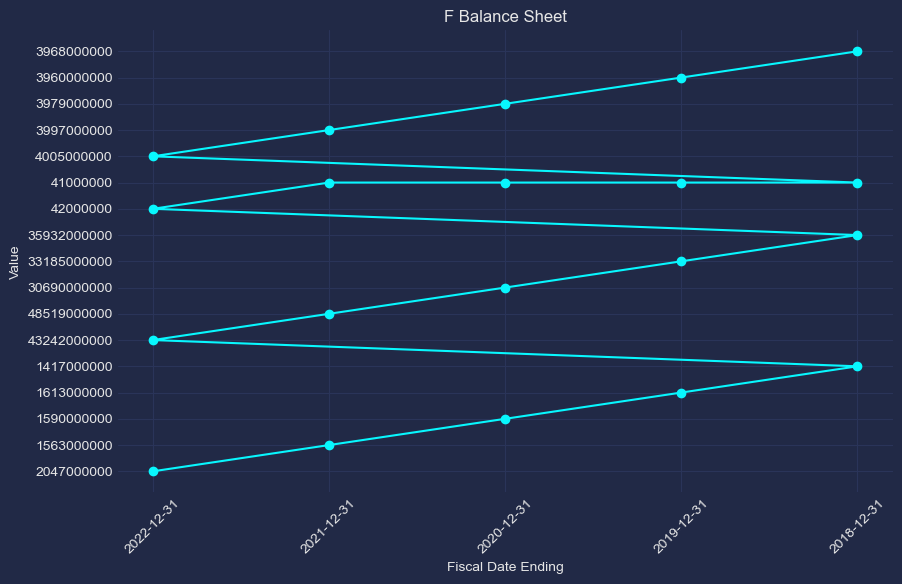

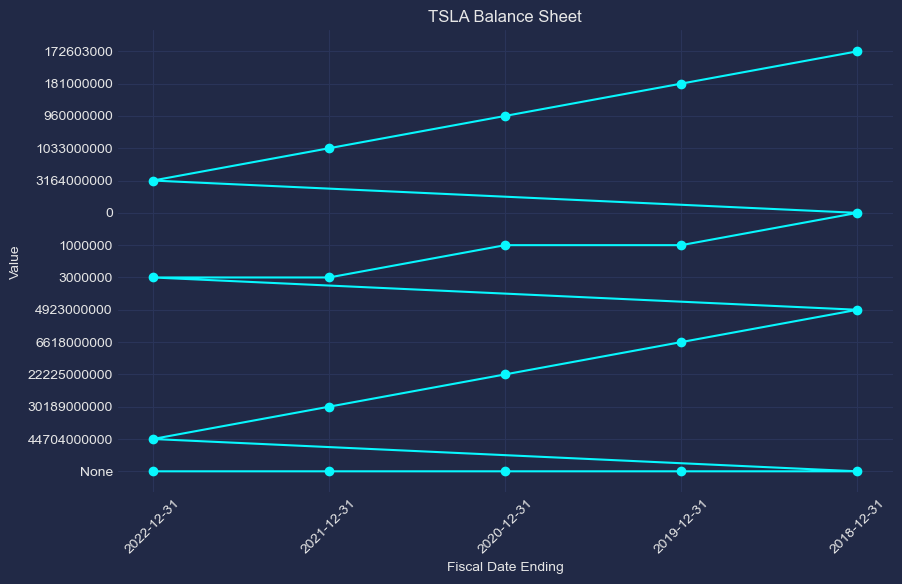

In [6]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
from dotenv import load_dotenv
import os

load_dotenv(dotenv_path='a.env')
vantage_key = os.environ['VANTAGE_KEY']

def get_balance_sheet_data(symbol):
    url = f'https://www.alphavantage.co/query?function=BALANCE_SHEET&symbol={symbol}&apikey={vantage_key}'
    r = requests.get(url)

    if r.status_code == 200:
        data = r.json()
        annual_reports = data.get("annualReports", [])
        
        # Create a DataFrame from the extracted data
        df = pd.DataFrame(annual_reports)
        
        # Select the desired columns
        selected_columns = ["fiscalDateEnding", "treasuryStock", "totalShareholderEquity", "commonStock", "commonStockSharesOutstanding"]
        df = df[selected_columns]
        
        return df
    else:
        print(f"Failed to retrieve data for {symbol}. Status code: {r.status_code}")
        return None

# List of tickers to iterate through
ticker_list = ["F","TSLA"]  # Add more tickers as needed

# Create a dictionary to store DataFrames for each ticker
dataframes = {}

# Iterate through the list of tickers
for ticker in ticker_list:
    df = get_balance_sheet_data(ticker)
    
    if df is not None:
        # Melt the DataFrame to merge columns into the same "fiscalDateEnding" column
        df = pd.melt(df, id_vars="fiscalDateEnding", var_name="Category", value_name="Value")
        dataframes[ticker] = df

# Display the DataFrames for each ticker
for ticker, df in dataframes.items():
    print(f"DataFrame for {ticker}:")
    print(df)

# Function to plot a line chart of a DataFrame
def plot_line_chart(df, x_col, y_col, title, x_label, y_label):
    plt.figure(figsize=(10, 6))
    plt.plot(df[x_col], df[y_col], marker='o', linestyle='-')
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

# Example usage to plot a line chart for a specific ticker and column
plot_line_chart(dataframes["F"], "fiscalDateEnding", "Value", "F Balance Sheet", "Fiscal Date Ending", "Value")
plot_line_chart(dataframes["TSLA"], "fiscalDateEnding", "Value", "TSLA Balance Sheet", "Fiscal Date Ending", "Value")


Enter the y-axis columns (comma-separated, e.g., totalShareholderEquity,commonStock): treasuryStock


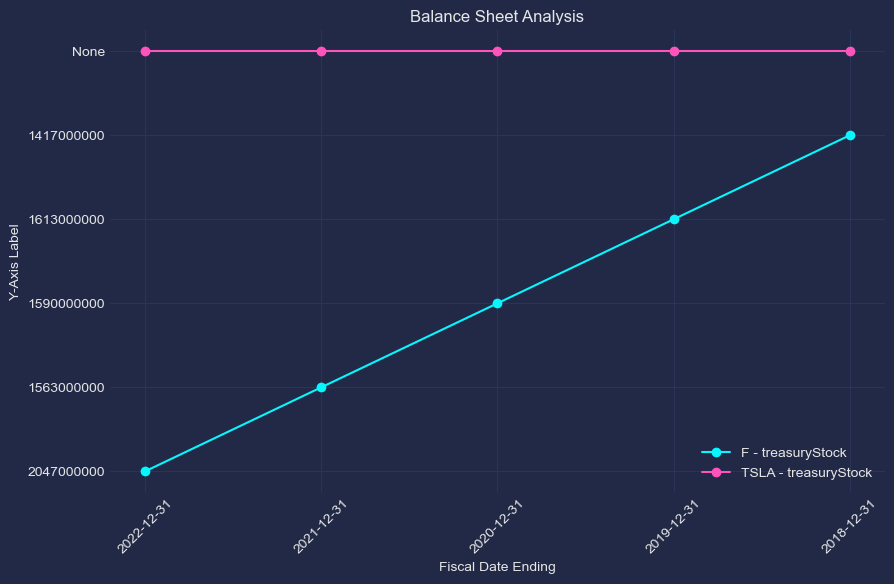

In [8]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
from dotenv import load_dotenv
import os

load_dotenv(dotenv_path='a.env')
vantage_key = os.environ['VANTAGE_KEY']

def get_balance_sheet_data(symbol):
    url = f'https://www.alphavantage.co/query?function=BALANCE_SHEET&symbol={symbol}&apikey={vantage_key}'
    r = requests.get(url)

    if r.status_code == 200:
        data = r.json()
        annual_reports = data.get("annualReports", [])
        
        # Create a DataFrame from the extracted data
        df = pd.DataFrame(annual_reports)
        
        return df
    else:
        print(f"Failed to retrieve data for {symbol}. Status code: {r.status_code}")
        return None

# List of tickers to iterate through
ticker_list = ["F", "TSLA"]  # Add more tickers as needed

# Create a dictionary to store DataFrames for each ticker
dataframes = {}

# Iterate through the list of tickers
for ticker in ticker_list:
    df = get_balance_sheet_data(ticker)
    
    if df is not None:
        dataframes[ticker] = df

# Function to plot a line chart of user-defined columns
def plot_line_chart(dataframes, y_cols, title, x_label, y_label):
    plt.figure(figsize=(10, 6))
    
    for ticker, df in dataframes.items():
        for y_col in y_cols:
            plt.plot(df["fiscalDateEnding"], df[y_col], marker='o', linestyle='-', label=f"{ticker} - {y_col}")
    
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.legend()
    plt.show()

# Get user input for the y-axis columns
y_columns = input("Enter the y-axis columns (comma-separated, e.g., totalShareholderEquity,commonStock): ").split(',')

# Example usage to plot a line chart for user-defined columns with "fiscalDateEnding" as the default x-axis
plot_line_chart(dataframes, y_columns, "Balance Sheet Analysis", "Fiscal Date Ending", "Y-Axis Label")
